In [1]:
from keras_facenet import FaceNet
import cv2
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
dataset = "dataset/images"

## Initiazling facenet embeder

In [3]:
embedder = FaceNet()

In [4]:
facenet_model = embedder.model
print(facenet_model.summary())

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)      (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (B  (None, None, None, 32)       96        ['Conv2d_1a_3x3[0][0]']       
 atchNormalization)                                                                               
                                                                                                  
 Conv2d_1a_3x3_Activation (  (None, None, None, 32)       0         ['Conv2d_1a_

In [5]:
img = cv2.imread("dataset/images/bibek/1.png")
emb = embedder.embeddings(np.expand_dims(img, axis=0))
len(emb[0])

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
emb

array([[-7.54306000e-03, -1.20512899e-02, -6.21822104e-03,
        -1.47628393e-02, -1.04171671e-02,  8.29657316e-02,
        -3.10246442e-02,  2.65236031e-02, -1.85583886e-02,
        -3.62223871e-02,  4.64661568e-02,  2.76057515e-02,
         3.11849229e-02,  3.72865237e-02, -1.42040718e-02,
         4.05947864e-02, -2.43957766e-05,  7.33344257e-02,
         3.17450776e-03, -4.19593565e-02, -6.72372943e-03,
         1.88295394e-02,  7.89218470e-02,  2.44337469e-02,
         6.20811768e-02, -1.42957047e-02, -7.98130706e-02,
        -3.91866360e-03,  4.44781817e-02, -5.96691249e-03,
        -3.35255750e-02, -3.61034013e-02,  7.86577701e-04,
         1.23045100e-02,  5.62127642e-02,  1.31078109e-01,
         5.20864911e-02, -2.88184802e-03,  1.42656248e-02,
         1.49013996e-02,  6.92508891e-02, -5.98193929e-02,
        -1.87358651e-02, -5.84782064e-02, -3.06452420e-02,
        -8.13606661e-03, -5.38990274e-02,  4.05717269e-02,
        -1.77395120e-02,  2.51860302e-02, -5.10939024e-0

## Extracting Features

In [6]:
features = []  
labels = []
for root, files, images in os.walk(dataset):
    print(root.split("/")[-1])

    for image in images:
        
        img = cv2.imread(os.path.join(root, image))
        embedeing = embedder.embeddings(np.expand_dims(img,axis=0))
        features.append(embedeing)
        labels.append(root.split("/")[-1])


images
images\Amit
1/1 [==============================] - 0s 75ms/step


In [7]:
for index,label in enumerate(labels):
    labels[index] = label.split("\\")[-1]

# Get Features and Label

In [8]:
features = np.array(features)
fet = features[:,0,:]
labels = np.array(labels)

In [9]:
fet.shape

(999, 512)

# Split

In [10]:
x_train, x_test , y_train, y_test =  train_test_split(fet, labels, test_size = 0.2, random_state=42)

# Fit

In [11]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
knn_predictions = knn.predict(x_test)
print("KNN Classification Report")
print(classification_report(y_test, knn_predictions))
print("KNN Accuracy: ", accuracy_score(y_test, knn_predictions))

KNN Classification Report
              precision    recall  f1-score   support

        Amit       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

KNN Accuracy:  1.0


# Save

In [13]:
import joblib
joblib.dump(knn, 'face_model/emb_knn_model.pkl')

['face_model/emb_knn_model.pkl']

# Load and Test 

In [14]:
import matplotlib.pyplot as plt

classes = list(set(labels))

In [15]:
import joblib
knn = joblib.load("face_model/emb_knn_model.pkl")

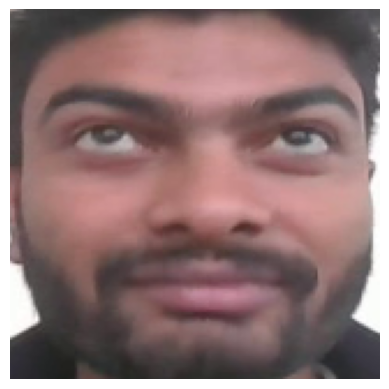

1/1 [==============================] - 0s 55ms/step
['Amit']
[[1.]]


In [16]:
for i in range(len(classes)):
    index = np.random.randint(1,1000)
    try:
        img = cv2.imread(f"dataset/images/{classes[i]}/{index}.png")
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        emb=  embedder.embeddings(np.expand_dims(img,axis=0))
        
        prediction = knn.predict(emb)
        print(prediction)
        proba = knn.predict_proba(emb)
        print(proba)
        
    except Exception as e:
       print(e)

# SVM

In [17]:
svm = SVC(probability=True)
svm.fit(x_train, y_train)

ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
svm_predictions = svm.predict(x_test)
print("KNN Classification Report")
print(classification_report(y_test, svm_predictions))
print("KNN Accuracy: ", accuracy_score(y_test, svm_predictions))

KNN Classification Report
              precision    recall  f1-score   support

        amit       1.00      1.00      1.00       203
       bibek       1.00      1.00      1.00       190

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393

KNN Accuracy:  1.0


# Save

In [ ]:
import joblib
joblib.dump(svm, 'face_svm_model/emb_svm_model.pkl')

['face_svm_model/emb_svm_model.pkl']

In [ ]:
import joblib
svm = joblib.load("face_svm_model/emb_svm_model.pkl")

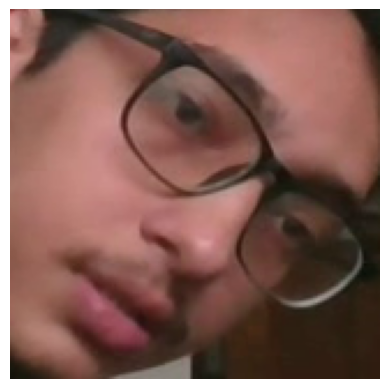

1/1 [==============================] - 0s 73ms/step
['bibek']
[[4.02967548e-06 9.99995970e-01]]


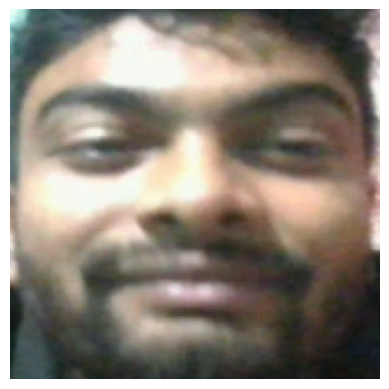

1/1 [==============================] - 0s 74ms/step
['amit']
[[0.99783823 0.00216177]]


In [ ]:
for i in range(len(classes)):
    index = np.random.randint(1,1000)
    try:
        img = cv2.imread(f"dataset/images/{classes[i]}/{index}.png")
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        emb=  embedder.embeddings(np.expand_dims(img,axis=0))
        
        prediction = svm.predict(emb)
        print(prediction)
        proba = svm.predict_proba(emb)
        print(proba)
        
    except Exception as e:
       print(e)